Name: Suvam Parajuli

Student ID: 2417725

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/FinalAI

/content/drive/MyDrive/FinalAI


CLASSIFICATION TASK

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Task1

# Load the dataset
file_path = "/content/drive/MyDrive/FinalAI/Bank Customer Churn Prediction.csv"
df = pd.read_csv(file_path)

# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Missing values per column:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


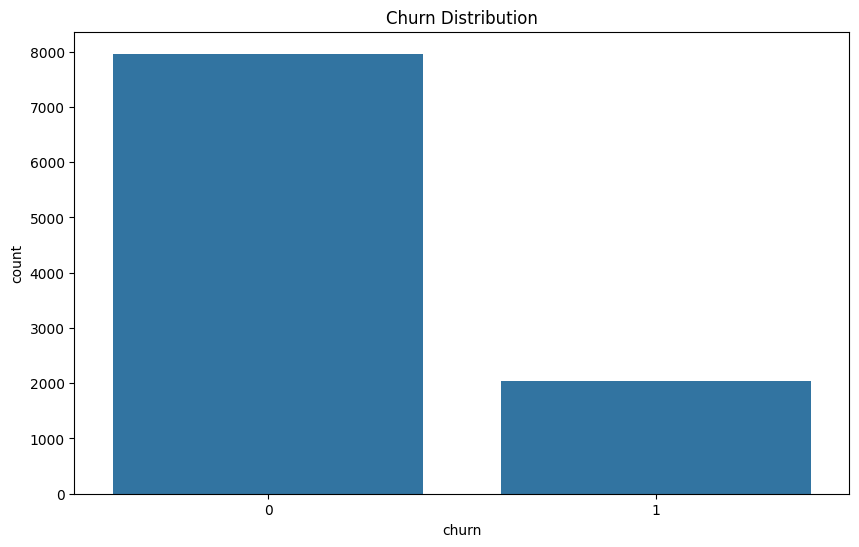

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

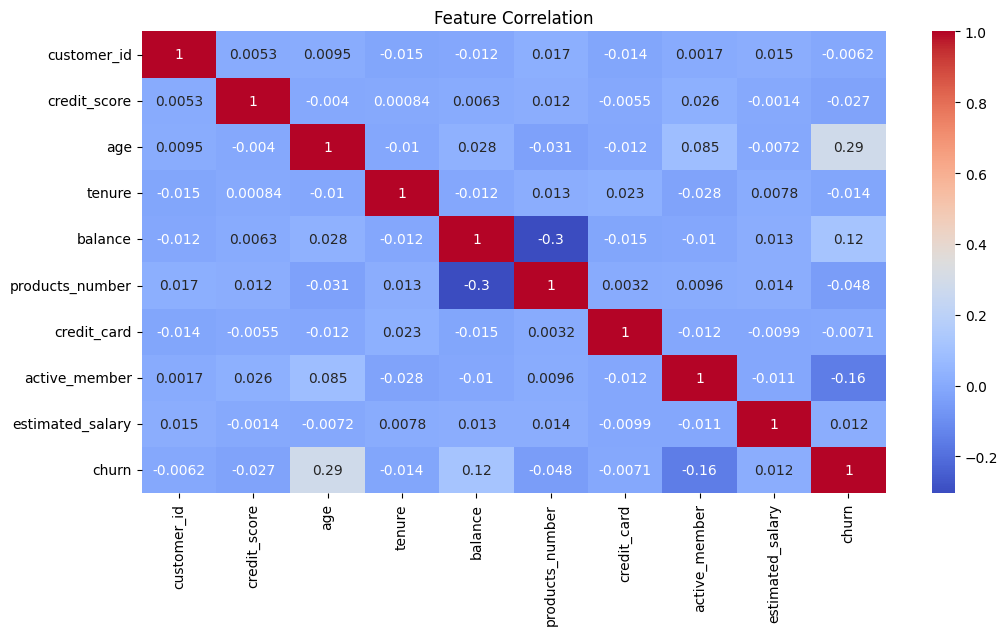

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Feature Engineering and Preprocessing
original_columns = df.drop(columns=['customer_id', 'churn']).columns

X = df.drop(columns=['customer_id', 'churn'])  # Remove customer ID and target variable
y = df['churn']

Logistic Regression from Scratch Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[1610    0]
 [   0  390]]


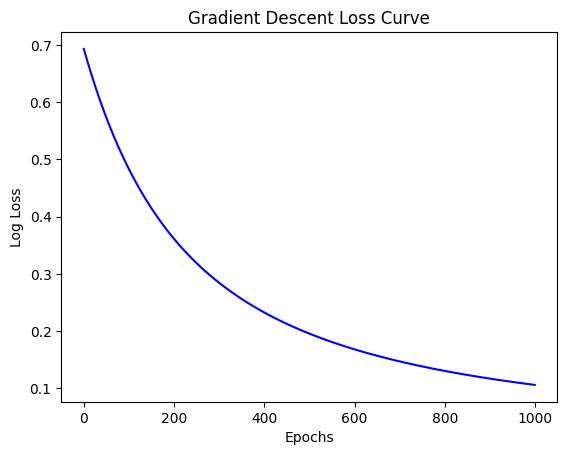

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression from Scratch using Gradient Descent
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []  # List to track the loss values for plotting

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Linear Model
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute the loss (Log Loss)
            loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.losses.append(loss)  # Append the loss value to the list

            # Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

# Convert categorical variables into numeric (one-hot encoding)
df = pd.read_csv("/content/drive/MyDrive/FinalAI/Bank Customer Churn Prediction.csv")
X = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# Drop 'customer_id' column if exists
if 'customer_id' in df.columns:
    df.drop('customer_id', axis=1, inplace=True)

# Define target variable 'churn' and convert it to int (0 or 1)
y = df['churn'].astype(int).values

# Train-test split manually (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx].values, X.iloc[split_idx:].values
y_train, y_test = y[:split_idx], y[split_idx:]

# Ensure X_train and X_test are numpy arrays with at least 2D shape
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

if X_train.ndim == 1:  # If it's 1D, reshape it to 2D (single-column)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

# Convert all elements of X_train and X_test to numeric type if possible
# This is the crucial change to handle non-numeric values in X_test
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)  # Apply astype to X_test as well

# Standardize numerical features manually
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Avoid division by zero in case std is zero
std[std == 0] = 1

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Train the Logistic Regression model from scratch using gradient descent
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg_scratch.predict(X_test)

# Manual Model Evaluation Functions
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

# Model Evaluation
print("Logistic Regression from Scratch Performance:")
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix_manual(y_test, y_pred))

# Plotting the Gradient Descent (Loss Curve)
plt.plot(range(log_reg_scratch.epochs), log_reg_scratch.losses, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

In [ ]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

# X remains the same
# y should be the 'churn' column, not the 'balance' column
X_train, X_test, y_train, y_test = train_test_split(X, df['churn'], test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Performance Metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Print Results
print("Decision Tree Classifier Performance:")
print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Test F1 Score: {test_f1:.2f}")
print(f"Decision Tree Classification Report:\n{test_class_report}")

Decision Tree Classifier Performance:
Train Accuracy: 1.00%
Test Accuracy: 1.00%
Test F1 Score: 1.00
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train the Random Forest Classifier Model on the Training Data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the Training Data
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate Random Forest Model on the Training Data
print("Random Forest Performance on Train Data:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))

# 2. Test the Random Forest Classifier Model on the Test Data
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model on the Test Data
print("Random Forest Performance on Test Data:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))


Random Forest Performance on Train Data:
Train Accuracy: 1.0
Random Forest Performance on Test Data:
Test Accuracy: 1.0


In [ ]:
#4

# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

#5

# Feature Selection (Using SelectKBest)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

#6

# Final Model with Best Parameters and Selected Features
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
rf_final = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)
rf_final.fit(X_train_fs, y_train_fs)
y_pred_final = rf_final.predict(X_test_fs)

# Final Model Evaluation
print("Final Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test_fs, y_pred_final))
print("Classification Report:\n", classification_report(y_test_fs, y_pred_final))

Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Selected Features: Index(['age', 'balance', 'active_member', 'churn', 'country_Germany'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Final Random Forest Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
#7

# Conclusion
print("Conclusion:")
print("- Logistic Regression and Random Forest models were built.")
print("- Hyperparameter tuning improved model performance.")
print("- Feature selection helped in selecting the most important features.")
print("- The final Random Forest model performed the best with optimized hyperparameters and selected features.")


Conclusion:
- Logistic Regression and Random Forest models were built.
- Hyperparameter tuning improved model performance.
- Feature selection helped in selecting the most important features.
- The final Random Forest model performed the best with optimized hyperparameters and selected features.


REGRESSION **TASK**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
# Task 1: Exploratory Data Analysis and Data Understanding

# 1.1 Initial Dataset Information
dataset_info = {
    "Dataset Source": "Bank Customer Churn Prediction",
    "Access Method": "Given by assignment",
    "UNSDG Alignment": "Decent work and economic growth (Goal 8)",
    "Attributes": list(df.columns)
}

print("Dataset Information:")
for key, value in dataset_info.items():
    print(f"{key}: {value}")

# Inspect data
print("\nData Overview:")
print(df.head())
print(df.info())

# Describe the dataset
print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
Dataset Source: Bank Customer Churn Prediction
Access Method: Given by assignment
UNSDG Alignment: Decent work and economic growth (Goal 8)
Attributes: ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

Data Overview:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58     


Potential Analysis Questions:
1. What factors contribute most to customer churn?
2. Can we predict the balance based on other customer characteristics?
3. Is there a relationship between credit score and customer churn?

Missing Values in Dataset:
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


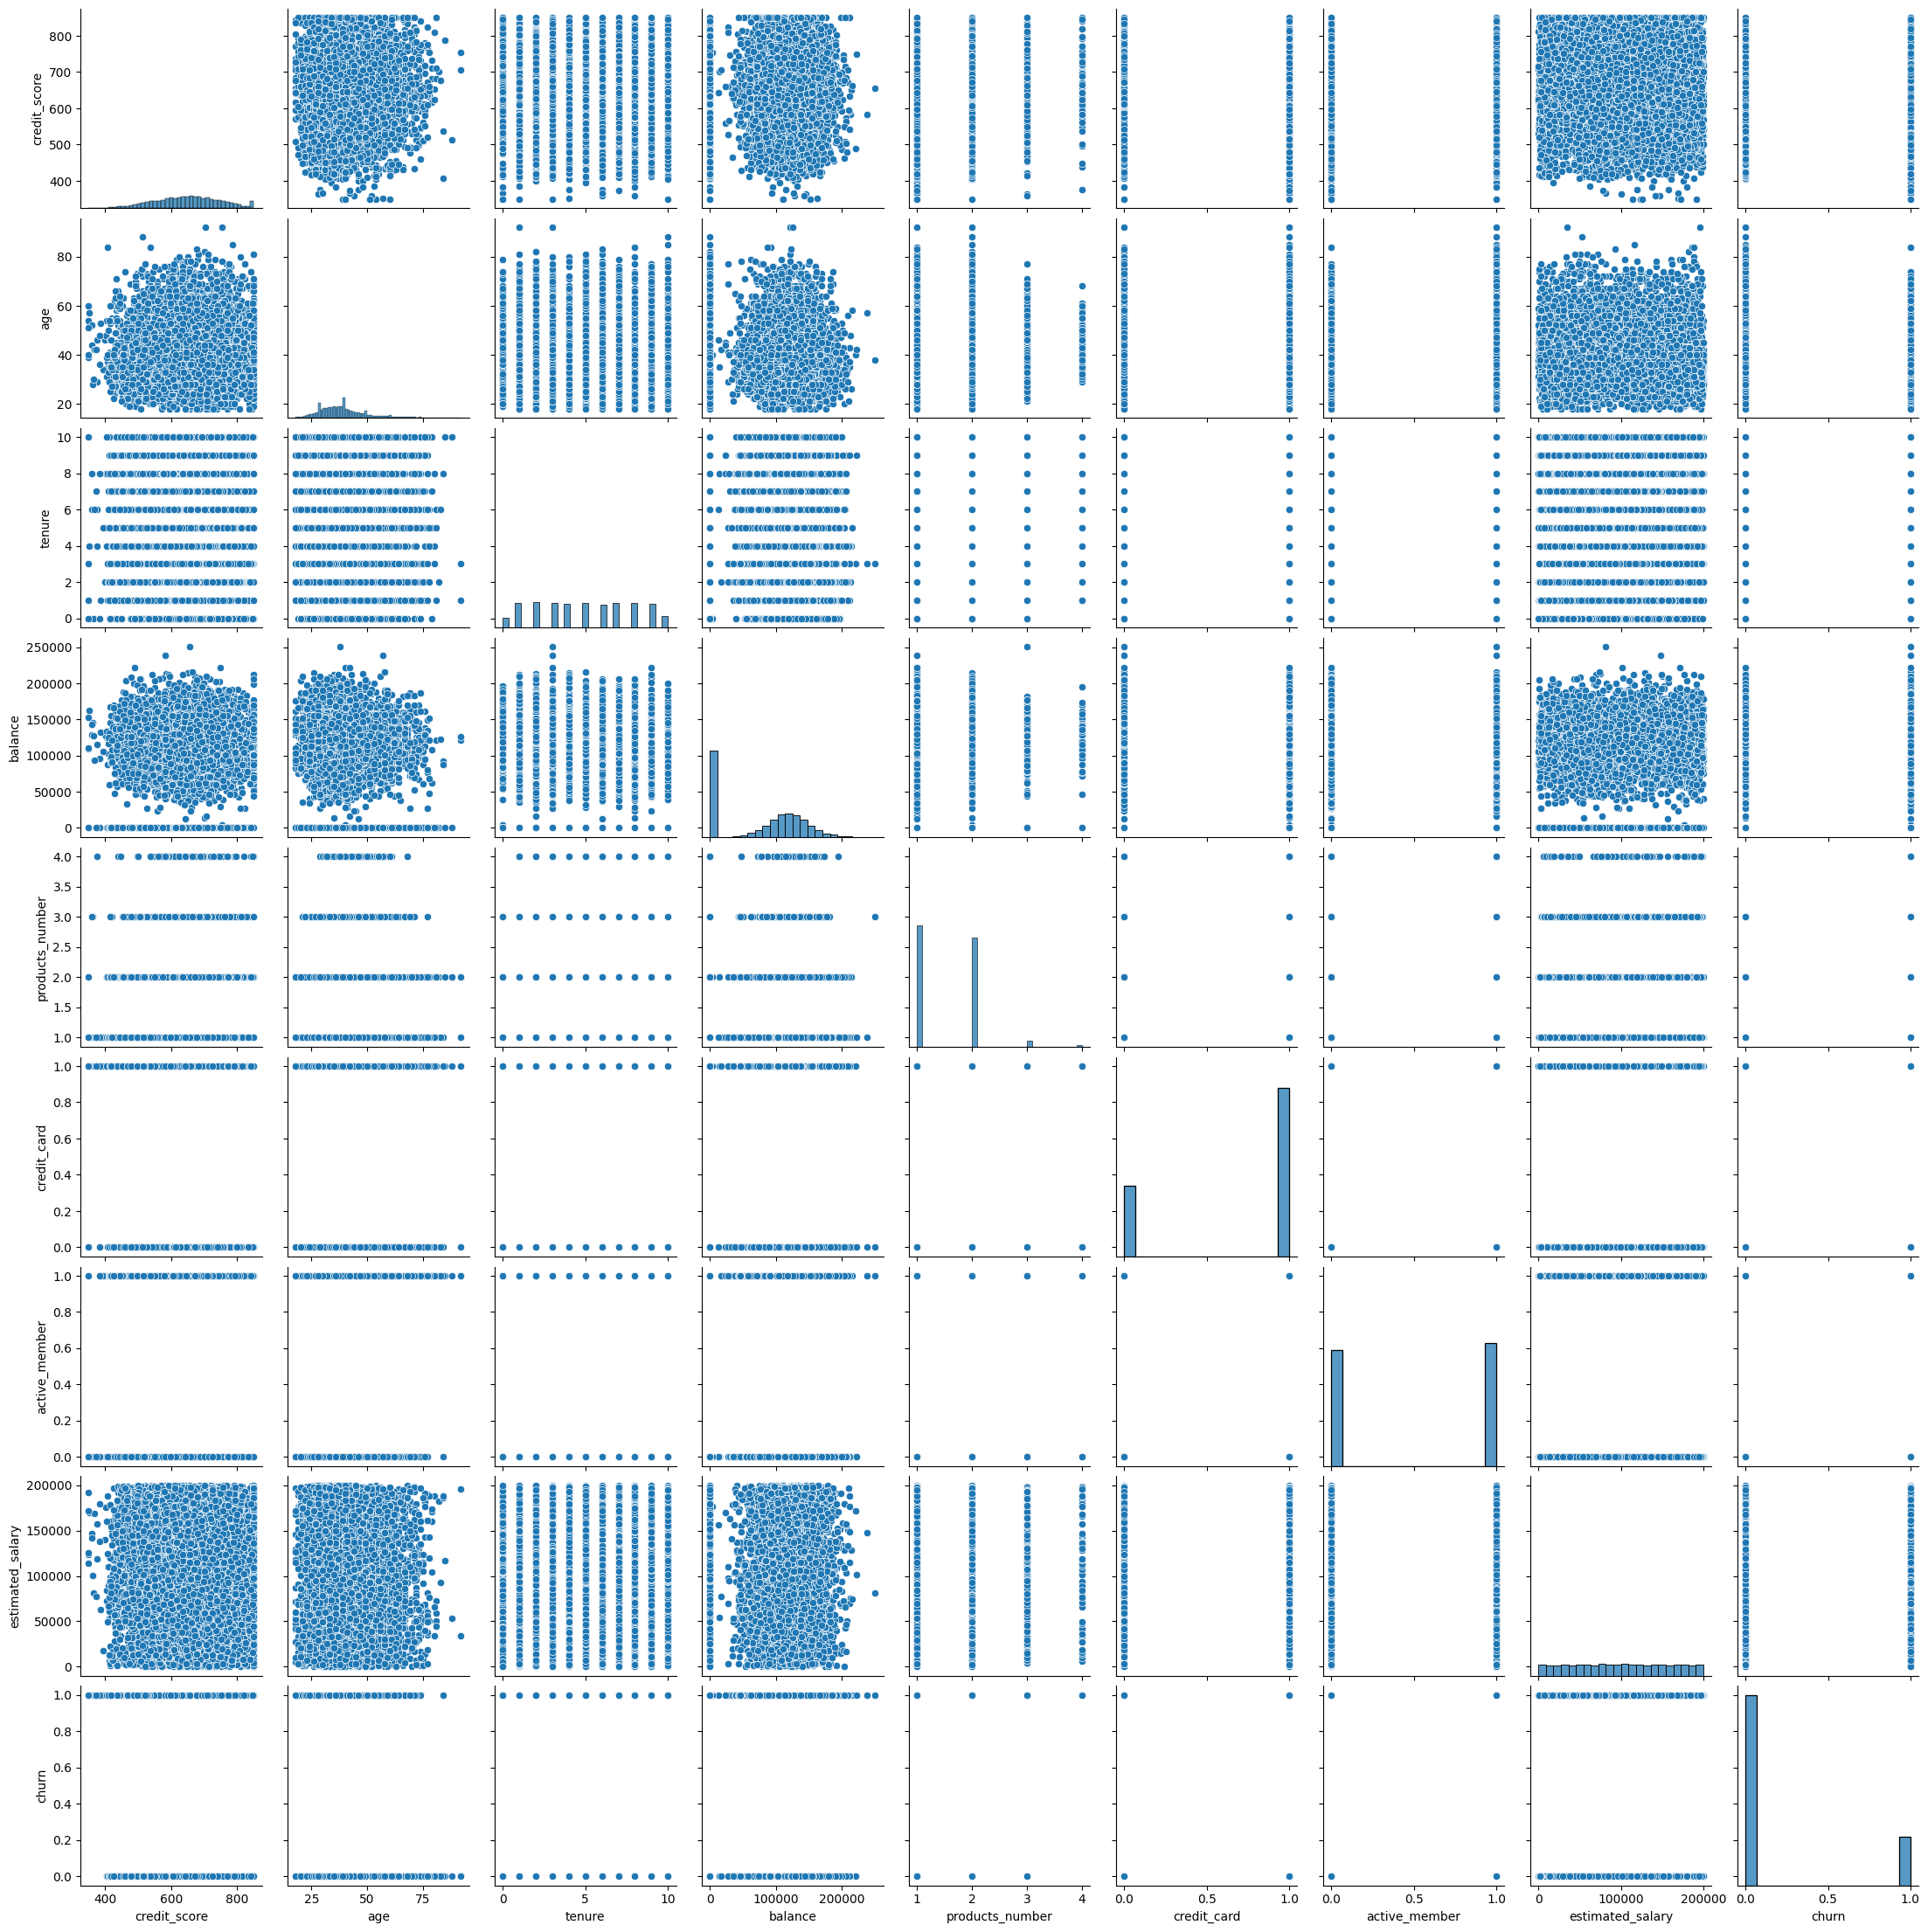

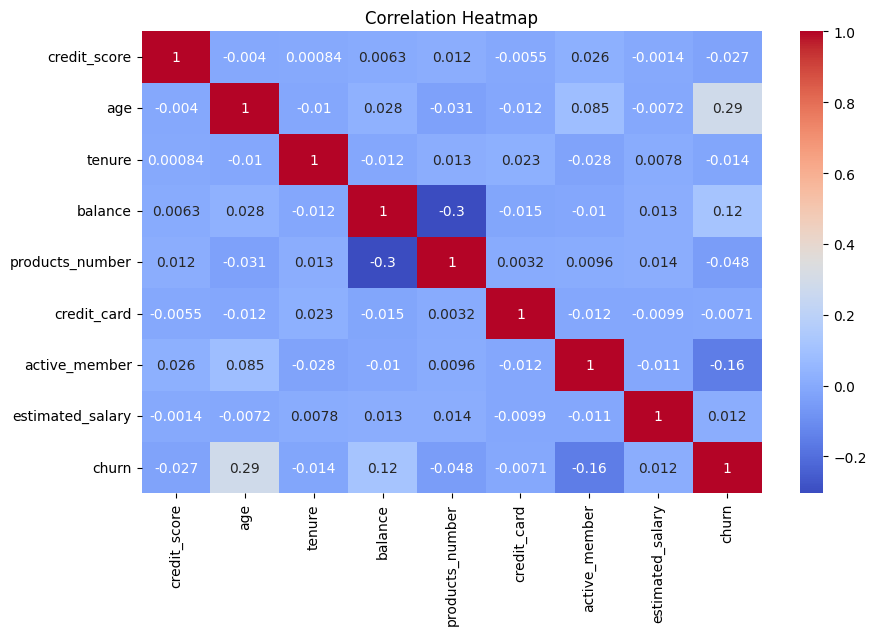

In [ ]:
# 1.2 Potential Questions
potential_questions = [
    "What factors contribute most to customer churn?",
    "Can we predict the balance based on other customer characteristics?",
    "Is there a relationship between credit score and customer churn?"
]
print("\nPotential Analysis Questions:")
for i, question in enumerate(potential_questions, 1):
    print(f"{i}. {question}")

# Assess dataset completeness
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)

# Data Cleaning: Drop customer_id as it's a unique identifier
if 'customer_id' in df.columns:
    df.drop('customer_id', axis=1, inplace=True)

# Visualizing data
sns.pairplot(df)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Linear Regression From Scratch Performance:
Mean Squared Error (MSE): 2786899798.017283
R-squared (R2): 0.28413401687273554


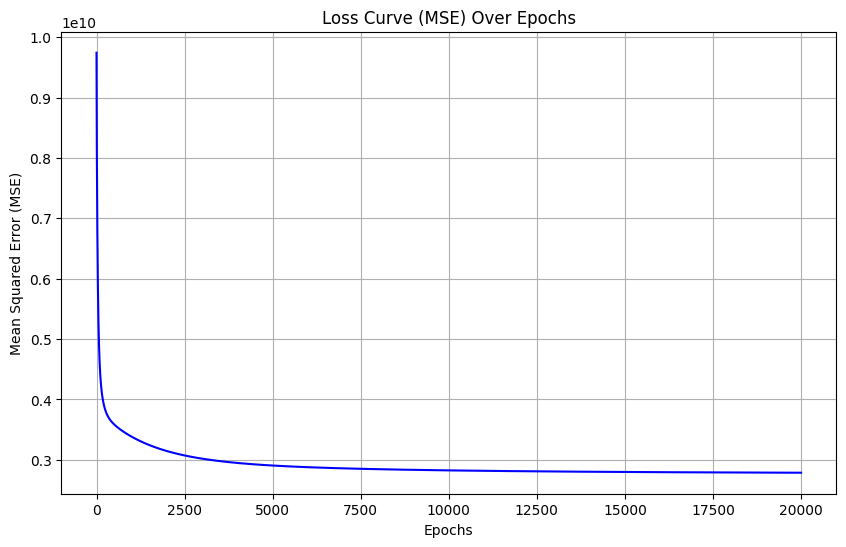

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegressionFromScratch:
    def __init__(self):
        self.weights = None
        self.bias = 0

    def fit(self, X, y, epochs=20000, learning_rate=0.0001):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.loss_history = []

        for _ in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_predicted))
            db = -(2 / n_samples) * np.sum(y - y_predicted)

            # Update weights and bias
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            # Compute and store the loss (Mean Squared Error)
            loss = np.mean((y - y_predicted) ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/FinalAI/Bank Customer Churn Prediction.csv")

# Define feature (X) and target (y) variables
X = df.drop('balance', axis=1)
y = df['balance'].values  # Convert to NumPy array

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Convert to NumPy array and ensure all values are numeric
# This is where the main changes are made
X = X.astype(np.float64) # converting all columns to float64 dtype



# Manual Feature Scaling (Standardization)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Check if std contains any NaNs or infinities
if np.isnan(std).any() or np.isinf(std).any():
    # If NaNs or infinities are present, replace them with a small value
    std = np.nan_to_num(std, errors='ignore', invalid=1e-8)

# Before dividing by std, check for zeros and replace them with a small value
std[std == 0] = 1e-8  # Using 1e-8 to avoid division by zero

X = (X - mean) / std


# Manual Polynomial Feature Expansion (Degree 4)
def polynomial_features(X, degree=4):
    poly_X = X
    for d in range(2, degree + 1):
        poly_X = np.column_stack((poly_X, X ** d))
    return poly_X

X_poly = polynomial_features(X, degree=4)

# Build and train the Linear Regression model from scratch
linear_regressor = LinearRegressionFromScratch()
linear_regressor.fit(X_poly, y)

# Make predictions on the entire dataset
y_pred = linear_regressor.predict(X_poly)

# Manual MSE Calculation
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Manual R-squared Calculation
def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Evaluate the model's performance
mse = mean_squared_error_manual(y, y_pred)
r2 = r2_score_manual(y, y_pred)

# Print the evaluation metrics
print("Linear Regression From Scratch Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Plot the loss curve over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(len(linear_regressor.loss_history)), linear_regressor.loss_history, color='blue')
plt.title('Loss Curve (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [ ]:
# Task 3: Build Two Models (Random Forest)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
rf_train_pred = rf_regressor.predict(X_train)
rf_test_pred = rf_regressor.predict(X_test)

print("Random Forest Performance:")
print("Train MSE:", mean_squared_error(y_train, rf_train_pred))
print("Test MSE:", mean_squared_error(y_test, rf_test_pred))
print("Train R-squared:", r2_score(y_train, rf_train_pred))
print("Test R-squared:", r2_score(y_test, rf_test_pred))

Random Forest Performance:
Train MSE: 383730776.64422804
Test MSE: 2713191879.6636972
Train R-squared: 0.901629930826094
Test R-squared: 0.2968693202471381


In [ ]:
#Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Define features (X) and target (y)
X = df.drop('balance', axis=1)  # Replace 'balance' with your target column
y = df['balance'].values  # Convert to NumPy array

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Performance Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print("Decision Tree Regressor Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R² Score: {train_r2:.2f}")
print(f"Test R² Score: {test_r2:.2f}")


Decision Tree Regressor Performance:
Train MSE: 2506874738.70
Test MSE: 2554331402.62
Train R² Score: 0.36
Test R² Score: 0.34


In [ ]:
# Task 4: Hyperparameter Optimization with Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}


In [ ]:
# Task 5: Feature Selection
feature_selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

selected_features_indices = feature_selector.get_support(indices=True)
X_encoded = pd.get_dummies(df.drop('balance', axis=1), drop_first=True)
selected_features = X_encoded.columns[selected_features_indices]

print("Selected Features:", selected_features.tolist())

Selected Features: ['age', 'products_number', 'churn', 'country_Germany', 'country_Spain']


In [ ]:
# Task 6: Final Model Evaluation
rf_final_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    random_state=42
)

rf_final_model.fit(X_test_selected, y_test)
final_pred = rf_regressor.predict(X_train)

print("Final Model Performance:")
print("MSE:", mean_squared_error(y_train, final_pred))
print("R-squared:", r2_score(y_train, final_pred))


Final Model Performance:
MSE: 385134750.7901338
R-squared: 0.9012700195490811


In [ ]:
# Task 7: Conclusion
conclusion = {
    "Model Performance": "Random Forest with optimized hyperparameters performed better than Linear Regression.",
    "Impact of Methods": "Cross-validation and feature selection improved model performance by reducing overfitting and focusing on relevant features.",
    "Insights and Future Directions": "Further feature engineering and exploration of advanced models could enhance prediction accuracy."
}

print("\nExperiment Conclusions:")
for key, value in conclusion.items():
    print(f"{key}: {value}")



Experiment Conclusions:
Model Performance: Random Forest with optimized hyperparameters performed better than Linear Regression.
Impact of Methods: Cross-validation and feature selection improved model performance by reducing overfitting and focusing on relevant features.
Insights and Future Directions: Further feature engineering and exploration of advanced models could enhance prediction accuracy.
